In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the data**

In [4]:
file_path = '/content/drive/My Drive/Projects/MarketBasketAnalysis/Groceries_data.csv'
df=pd.read_csv(file_path,encoding='unicode_escape')

**Understand the DataFrame**

In [31]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [33]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object

**Data Exploration and Preprocessing**

In [34]:
#Change 'Date' column to datetime type
df['DateTime']=pd.to_datetime(df['Date'])
df['DateTime'].describe()

<ipython-input-34-5ab3d01bf357>:3: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   38765
unique                    728
top       2015-01-21 00:00:00
freq                       96
first     2014-01-01 00:00:00
last      2015-12-30 00:00:00
Name: DateTime, dtype: object

The time-series is from 1/1/2014 to 12/30/2015, which is 2 year.

In [35]:
#Clean the dataset
df.drop(df[df['Member_number'].isnull()].index, inplace= True)

In [36]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [37]:
#Quantity of items sold during the 2014-2015 period
value_counts = df['itemDescription'].value_counts().reset_index()
value_counts.columns = ['itemDescription', 'count']
fig = px.treemap(value_counts, path=['itemDescription'], values='count')
fig.show()

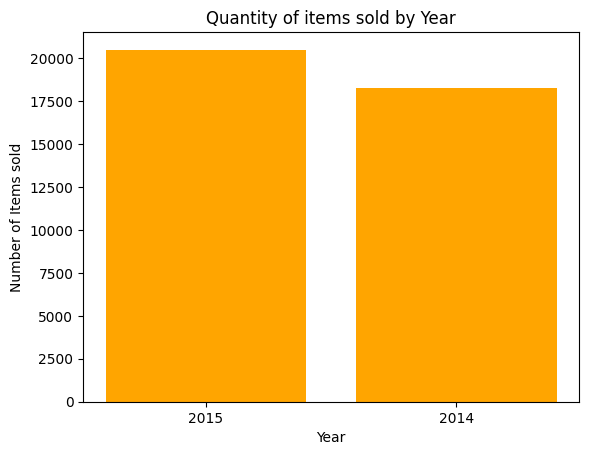

In [40]:
#Number of items sold by year
year = df['year'].value_counts().reset_index()
year.columns = ['year','transaction']
year

plt.bar(year['year'].astype(str), year['transaction'], color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Items sold')
plt.title('Quantity of items sold by Year')
plt.show()

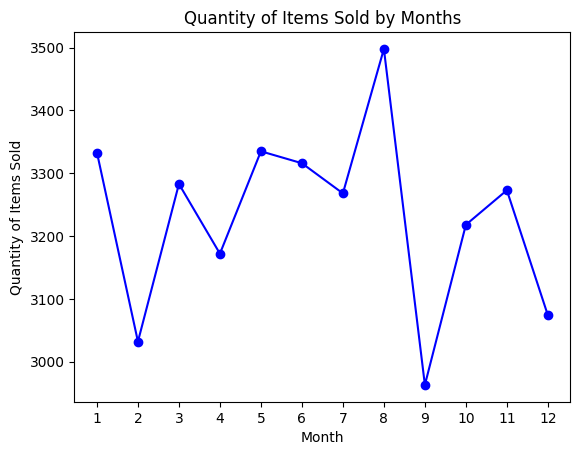

In [48]:
#Quantity of Items Sold by Months
month = df['month'].value_counts().reset_index()
month.columns = ['month','counts']
month = month.sort_values('month')
month

plt.plot(month['month'], month['counts'], marker='o', linestyle='-', color='b', label='Line Chart')
plt.xlabel('Month')
plt.ylabel('Quantity of Items Sold')
plt.title('Quantity of Items Sold by Months')

plt.xticks(month['month'])

plt.show()

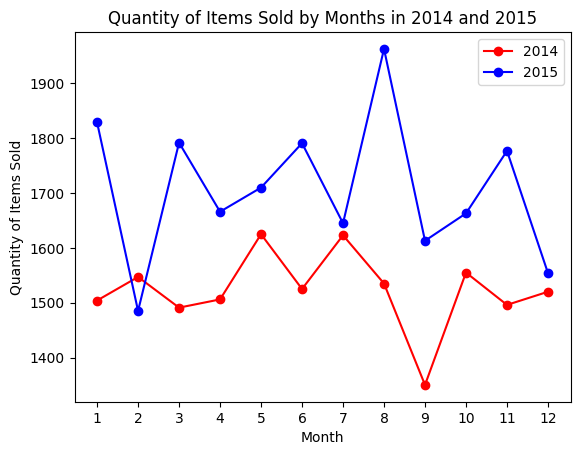

In [71]:
#Analyze number of products purchased by Month in 2014 and 2015
df_2014 = df[df['year']==2014]
month2014 = df_2014['month'].value_counts().reset_index()
month2014.columns = ['month','counts']
month2014 = month2014.sort_values('month')

df_2015 = df[df['year']==2015]
month2015 = df_2015['month'].value_counts().reset_index()
month2015.columns = ['month','counts']
month2015 = month2015.sort_values('month')

plt.plot(month2014['month'], month2014['counts'], marker='o', linestyle='-', color='r', label='2014')
plt.plot(month2015['month'], month2015['counts'], marker='o', linestyle='-', color='b', label='2015')
plt.xlabel('Month')
plt.ylabel('Quantity of Items Sold')
plt.title('Quantity of Items Sold by Months in 2014 and 2015')

plt.xticks(month2014['month'])

plt.legend()

plt.show()

According two line chart above, we can see November was the highest sale month, while September occupied the lowest sale in both year. The sale in 2015 is clearly higher than that of 2014.

**Transaction Encode**

In [5]:
#Generate baskets of item that bought together
#It also shows the list of transactions by Customer and Date, including their basket items.
df_grouped = df.groupby(['Member_number','Date'])['itemDescription'].agg(list).reset_index()
df_grouped

,Member_number,Date,itemDescription
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"
...,...,...,...
14958,4999,2015-05-16,"[butter milk, whipped/sour cream]"
14959,4999,2015-12-26,"[bottled water, herbs]"
14960,5000,2014-09-03,"[fruit/vegetable juice, onions]"
14961,5000,2014-11-16,"[bottled beer, other vegetables]"


In [6]:
#Change 'Description' to string type to be encoded
df['itemDescription']=df['itemDescription'].astype(str)

In [7]:
#Convert the DataFrame into a list of transaction
transactions = df.groupby(['Member_number','Date'])['itemDescription'].apply(list).tolist()
#Encode the data to generate frequent itemsets
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()
transaction_encoder = encoder.fit(transactions).transform(transactions)
transaction_encoder

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
#Create a new DataFrame of itemsets
itemsets = pd.DataFrame(transaction_encoder, columns = encoder.columns_)
itemsets.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Columns: 167 entries, Instant food products to zwieback
dtypes: bool(167)
memory usage: 2.4 MB


**Apply FpGrowth Algorithm**

***Generate Frequent Itemset***

In [10]:
from mlxtend.frequent_patterns import fpgrowth

In [15]:
frequent_itemsets = fpgrowth(itemsets, min_support=0.001, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.157923,(whole milk)
1,0.051728,(pastry)
2,0.018780,(salty snack)
3,0.085879,(yogurt)
4,0.060349,(sausage)
...,...,...
745,0.001403,"(yogurt, chewing gum)"
746,0.001069,"(chewing gum, other vegetables)"
747,0.001002,"(soda, chewing gum)"
748,0.001069,"(whole milk, pasta)"


In [16]:
frequent_itemsets.sort_values('support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.157923,(whole milk)
18,0.122101,(other vegetables)
11,0.110005,(rolls/buns)
6,0.097106,(soda)
3,0.085879,(yogurt)
...,...,...
191,0.001002,"(whole milk, soda, rolls/buns)"
466,0.001002,"(bottled beer, chicken)"
473,0.001002,"(chicken, domestic eggs)"
286,0.001002,"(beef, canned beer)"


In [17]:
#Filter itemsets that has more than 1 item
length = frequent_itemsets['itemsets'].str.len()
row = length > 1
frequent_itemsets[row]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
149,0.006483,"(pastry, whole milk)"
150,0.002874,"(pastry, root vegetables)"
151,0.003676,"(pastry, other vegetables)"
152,0.003609,"(pastry, yogurt)"
153,0.003208,"(pastry, sausage)"
...,...,...
745,0.001403,"(yogurt, chewing gum)"
746,0.001069,"(chewing gum, other vegetables)"
747,0.001002,"(soda, chewing gum)"
748,0.001069,"(whole milk, pasta)"


In [18]:
#Describe 'Support' by the length of the itemset
frequent_itemsets.groupby(length)['support'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
itemsets,,,,,,,,
1,149.0,0.016990,0.024156,0.001002,0.002941,0.007084,0.020250,0.157923
2,592.0,0.002188,0.001678,0.001002,0.001270,0.001571,0.002473,0.014837
3,9.0,0.001181,0.000142,0.001002,0.001136,0.001136,0.001203,0.001470


**Create Association Rule**

In [19]:
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pastry),(whole milk),0.051728,0.157923,0.006483,0.125323,0.793571,-0.001686,0.962729,-0.215266
1,(salty snack),(whole milk),0.018780,0.157923,0.001938,0.103203,0.653502,-0.001028,0.938983,-0.350804
2,(salty snack),(rolls/buns),0.018780,0.110005,0.001938,0.103203,0.938168,-0.000128,0.992415,-0.062941
3,(salty snack),(other vegetables),0.018780,0.122101,0.002205,0.117438,0.961807,-0.000088,0.994716,-0.038896
4,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
...,...,...,...,...,...,...,...,...,...,...
125,(cat food),(whole milk),0.011829,0.157923,0.001671,0.141243,0.894379,-0.000197,0.980577,-0.106750
126,(chewing gum),(whole milk),0.012030,0.157923,0.001671,0.138889,0.879473,-0.000229,0.977896,-0.121816
127,(chewing gum),(yogurt),0.012030,0.085879,0.001403,0.116667,1.358508,0.000370,1.034855,0.267112
128,(pasta),(whole milk),0.008087,0.157923,0.001069,0.132231,0.837316,-0.000208,0.970394,-0.163793



***Meaning of the Values***
*   Support: The proportion of transactions that contain the items in the rule.
*   Confidence: The likelihood that the rule is true.
*   Lift: The strength of the association between 'antecedents' and 'consequents', with values greater than 1 suggesting a positie association.
*   Leverage: The normalization value of Lift
*   Conviction: It measures how much more often the 'antecedent' occurs without the 'consequent' than expected if 'antecedent' and 'consequent' were independent.
*   Zhang's Metric: A metric for assessing the interestingness of association rules. It is particularly useful for handling low support and high confidence rules.







In [38]:
#Filter by antecedents that contains the item
rows=rules['consequents'].astype(str).str.contains('vegetables')
rules[rows]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(salty snack),(other vegetables),0.018780,0.122101,0.002205,0.117438,0.961807,-0.000088,0.994716,-0.038896
5,"(whole milk, yogurt)",(other vegetables),0.011161,0.122101,0.001136,0.101796,0.833705,-0.000227,0.977394,-0.167857
18,(semi-finished bread),(other vegetables),0.009490,0.122101,0.001002,0.105634,0.865133,-0.000156,0.981588,-0.135983
23,"(soda, rolls/buns)",(other vegetables),0.008087,0.122101,0.001136,0.140496,1.150651,0.000149,1.021402,0.131994
27,(hygiene articles),(other vegetables),0.013700,0.122101,0.001403,0.102439,0.838968,-0.000269,0.978094,-0.162904
33,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
34,(curd),(other vegetables),0.033683,0.122101,0.003542,0.105159,0.861243,-0.000571,0.981067,-0.142903
38,(white bread),(other vegetables),0.023993,0.122101,0.002606,0.108635,0.889714,-0.000323,0.984893,-0.112692
41,(frozen vegetables),(other vegetables),0.028002,0.122101,0.003141,0.112172,0.918679,-0.000278,0.988816,-0.083468
45,(specialty chocolate),(other vegetables),0.015973,0.122101,0.001671,0.104603,0.856687,-0.000280,0.980457,-0.145301


In [22]:
#Filter by the length of antecedents or consequents
rows=rules['antecedents'].str.len()>1
rules[rows]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,"(whole milk, yogurt)",(other vegetables),0.011161,0.122101,0.001136,0.101796,0.833705,-0.000227,0.977394,-0.167857
6,"(yogurt, other vegetables)",(whole milk),0.008087,0.157923,0.001136,0.140496,0.889649,-0.000141,0.979724,-0.111151
7,"(whole milk, yogurt)",(rolls/buns),0.011161,0.110005,0.001337,0.119760,1.088685,0.000109,1.011083,0.082380
8,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751
10,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
11,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
12,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
13,"(whole milk, sausage)",(rolls/buns),0.008955,0.110005,0.001136,0.126866,1.153275,0.000151,1.019311,0.134105
14,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
15,"(whole milk, sausage)",(soda),0.008955,0.097106,0.001069,0.119403,1.229612,0.000200,1.025320,0.188423


In [32]:
#Top 5 itemsets that has the highest 'Lift'
rules.sort_values(by='lift', ascending=False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
10,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
12,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
70,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969,0.385385
93,(processed cheese),(root vegetables),0.010158,0.069572,0.001069,0.105263,1.513019,0.000363,1.039891,0.342549


**Evaluate Association Rules**

In [23]:
rules.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.023819,0.137451,0.002945,0.125880,0.947387,-0.000479,0.987170,-0.075935
std,0.020395,0.025729,0.002539,0.021809,0.241180,0.000842,0.032519,0.185256
min,0.005347,0.060349,0.001002,0.100000,0.645777,-0.004446,0.937707,-0.359703
25%,0.010242,0.122101,0.001337,0.110293,0.806678,-0.000704,0.965013,-0.196215
50%,0.016574,0.157923,0.001938,0.121906,0.881796,-0.000283,0.980261,-0.120196
75%,0.032062,0.157923,0.003793,0.134806,1.032466,0.000046,1.004864,0.031867
max,0.122101,0.157923,0.014837,0.255814,2.182917,0.000797,1.131541,0.548014


In [36]:
#Filter the itemset that 'lift'>1 (positive association), 'confidence' and 'support' higher than their mean.
rows = ((rules['support']>0.002) & (rules['confidence']>0.12) & (rules['lift']>1))
rules[rows]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
47,(frozen meals),(other vegetables),0.016775,0.122101,0.002139,0.127490,1.044134,0.000090,1.006176,0.042990
100,(meat),(other vegetables),0.016842,0.122101,0.002139,0.126984,1.039991,0.000082,1.005593,0.039112
114,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,0.000013,1.000682,0.004984
117,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
